In [1]:
#import require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
#load data set
data = pd.read_csv('FuelConsumption.csv')
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
#data describe
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#column information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
#check null value
data.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

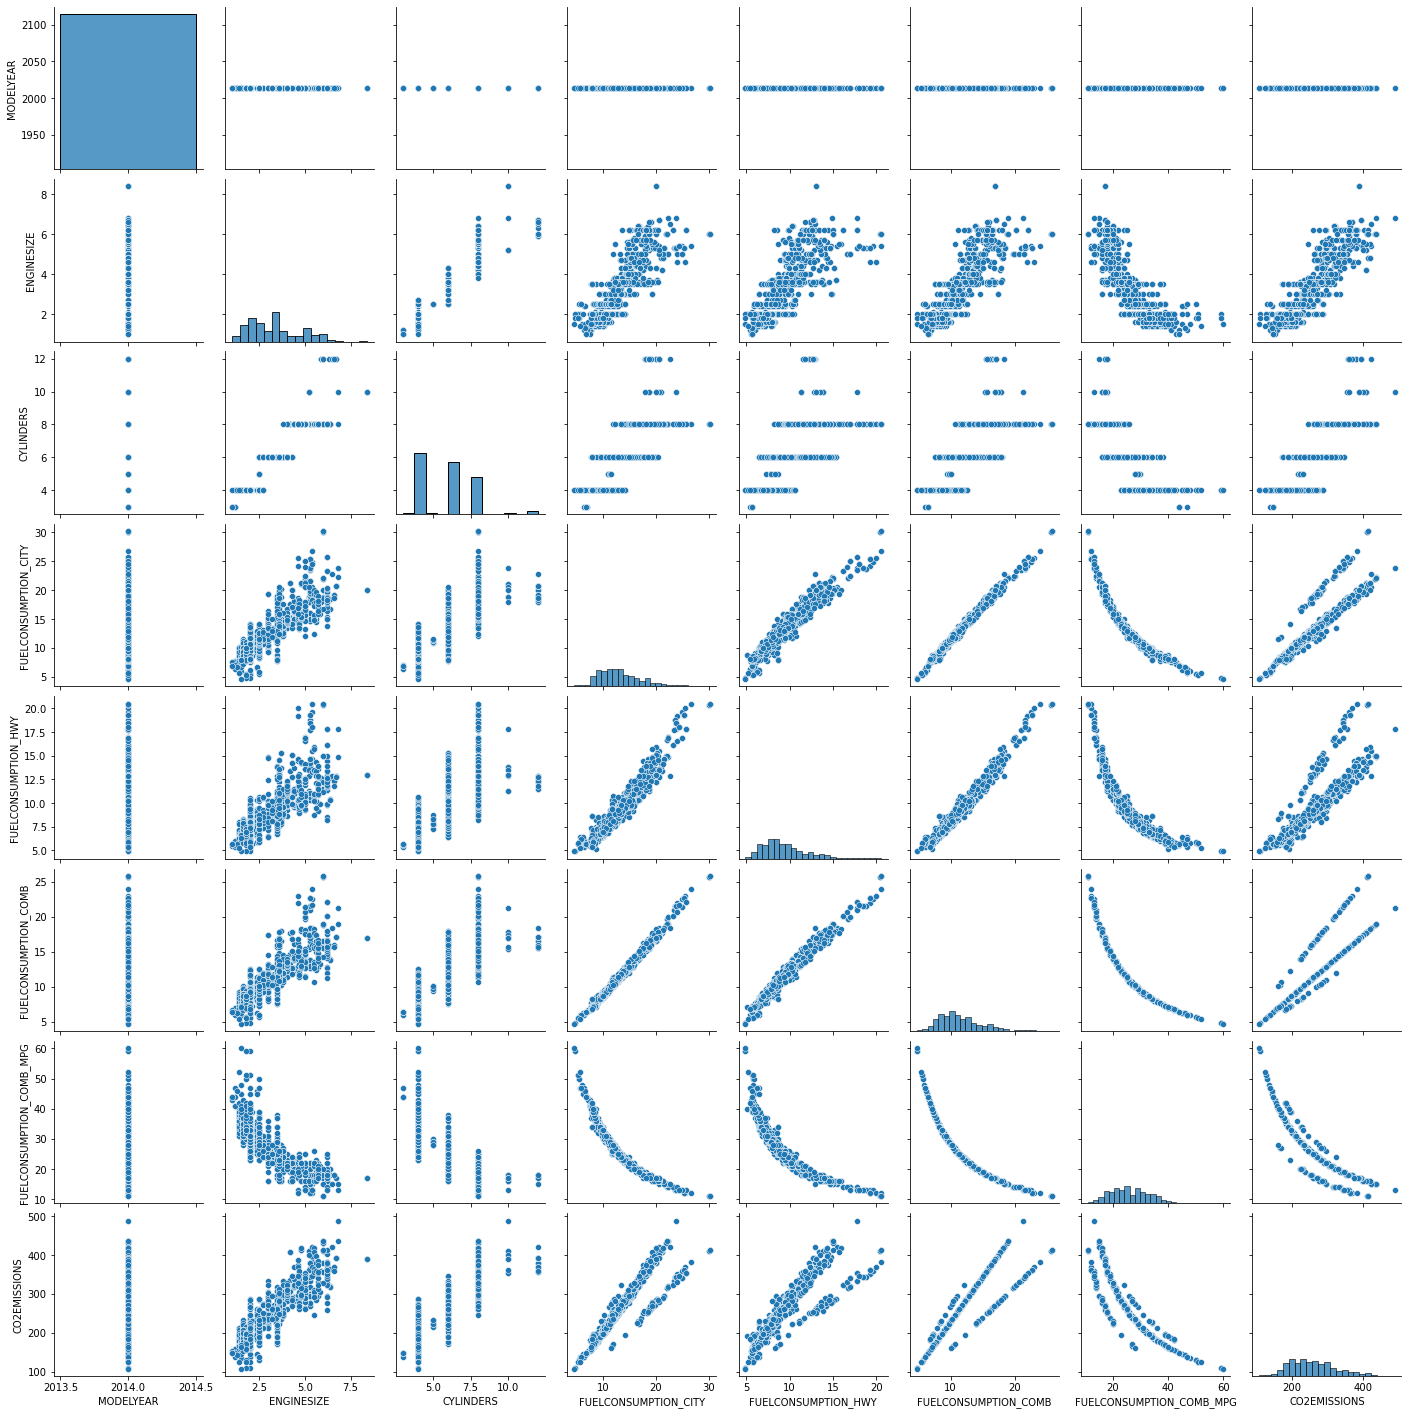

In [6]:
#data visualize
sns.pairplot(data)

In [7]:
#Separate label and feature 
X=data[['ENGINESIZE',
                 'CYLINDERS',
                 'FUELCONSUMPTION_CITY',
                 'FUELCONSUMPTION_HWY',
                 'FUELCONSUMPTION_COMB',
                 'FUELCONSUMPTION_COMB_MPG']]
Y=data["CO2EMISSIONS"]

In [8]:
#check X data shape
X.shape

(1067, 6)

In [9]:
#check X data shape
Y.shape

(1067,)

In [10]:
#split data set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [11]:
#check X_Train data shape
X_Train.shape

(800, 6)

In [12]:
#check  X_Test data shape
X_Test.shape

(267, 6)

In [13]:
#model load
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [14]:
# Slopes of Stright Line
regressor.coef_

array([  9.11620372,   8.0865686 , -14.88317428,  -6.32133311,
        24.61527912,  -3.93008501])

In [15]:
#intercept Point In Y axis
regressor.intercept_

256.2726526113803

In [16]:
#predict data
Y_pred = regressor.predict(X_Test)

In [17]:
#Accuracy
score=r2_score(Y_Test, Y_pred)
print("Accuracy of a Model is : {}".format(score))

Accuracy of a Model is : 0.8878999209669733


In [18]:
# Total Mean Error
mean_squared_error(Y_Test, Y_pred)

456.85582496483755

In [19]:
mean_absolute_error(Y_Test, Y_pred)

14.28774432663407

# Corss Validation of Model

In [20]:
cv = cross_val_score(regressor, X_Train, Y_Train,cv = 20)
cv

array([0.76503311, 0.89307614, 0.90223057, 0.87833475, 0.90746606,
       0.82690528, 0.85039767, 0.88578756, 0.93318257, 0.94833688,
       0.91982491, 0.87841935, 0.86695825, 0.91329495, 0.88986575,
       0.83533065, 0.90683527, 0.85088328, 0.93800666, 0.89626899])

In [21]:
np.mean(cv)

0.8843219340704124

In [22]:
np.max(cv)

0.9483368834458752

In [23]:
np.min(cv)

0.7650331142813103